# E-news Express Project

## Description

Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions: \

1. Do the users spend more time on the new landing page than on the existing
landing page? \
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? \
3. Does the converted status depend on the preferred language? \
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.



1.   user_id - Unique user ID of the person visiting the website
2.   group - Whether the user belongs to the first group (control) or the second group (treatment)
3.   landing_page - Whether the landing page is new or old
4.   time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5.   converted - Whether the user gets converted to a subscriber of the news portal or not
6.   language_preferred - language chosen by the user to view the landing page

## Import Libraries

In [49]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [50]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Great Learning")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Exploratory Data Analysis

In [52]:
# Reading the data collected by E-new Express
raw_data = pd.read_csv("Projects/abtest.csv")
raw_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [53]:
## Checking if there are any missing values in the dataframe
raw_data.isna().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [54]:
# Let's check the data types of each feature in the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [55]:
# Converting user_id column to object as it would not require any mathematical operations
raw_data["user_id"] = raw_data["user_id"].astype("object")

In [56]:
# Statistical summary of the data
raw_data.describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.0,100,100,100.000000,100,100
unique,100.0,2,2,NaN,2,3
top,546592.0,control,old,NaN,yes,Spanish
freq,1.0,50,50,NaN,54,34
mean,NaN,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,NaN,7.022500,NaN,NaN


In [57]:
# Checking the number of unique values for each categorical feature
for col in raw_data.columns:
  if raw_data[col].dtype == "object" and col != "user_id":
      print(f"{col} : {raw_data[col].nunique()} unique values. The unique values are {raw_data[col].unique().tolist()}")

group : 2 unique values. The unique values are ['control', 'treatment']
landing_page : 2 unique values. The unique values are ['old', 'new']
converted : 2 unique values. The unique values are ['no', 'yes']
language_preferred : 3 unique values. The unique values are ['Spanish', 'English', 'French']


## Univariate Analysis

### Categorical Variables

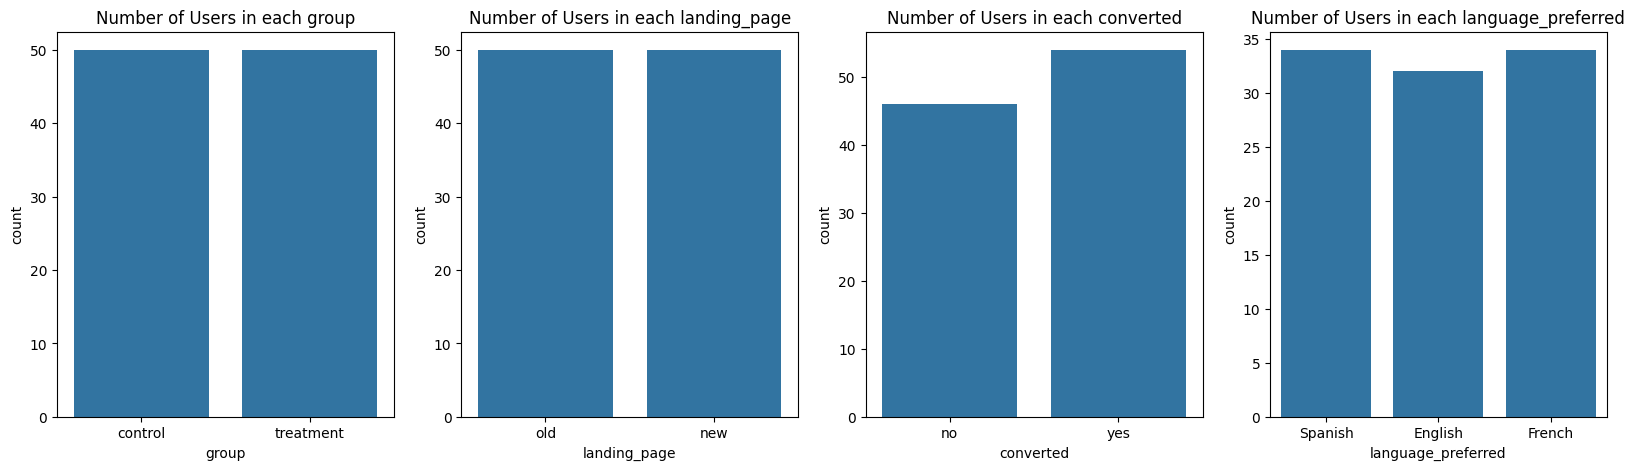

In [58]:
## Frequency of users in each categorical variable

#Creating plot which will contain graph for each categorical variable
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=False)
categorical_var = [col for col in raw_data.columns if raw_data[col].dtype == "object" and col != "user_id"] # list of categorical variables
for i,col in enumerate(categorical_var):
  sns.countplot(data=raw_data, x=col, ax=axes[i]).set_title(f"Number of Users in each {col}"); #Count Plot for every categorical variable
plt.show()

The Data provided would give us an insight whether the new landing page is better than the old language. The above plots confirm that there are two groups(control and treatment) and each group has 50 users. \
There are slightly more conversions, however further investigations are required to understand what is atributting to these conversions.
100 users are divided almost equally among the three languages (English, Spanish, Frencg)

### Numerical Variables: time_spent_on_the_page

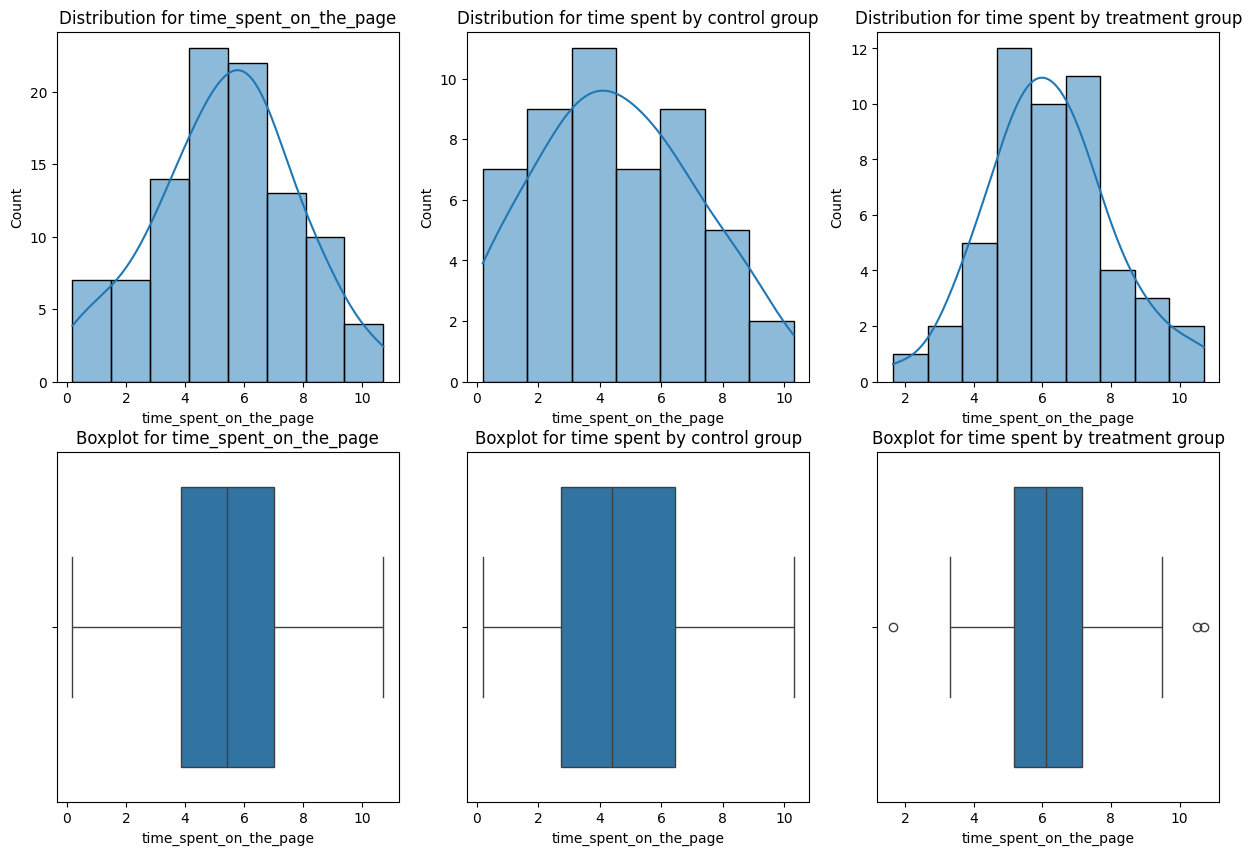

In [59]:
#Plot for creating histogram for time spent by users on the landing page
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=False)
time_hist = sns.histplot(data=raw_data, x="time_spent_on_the_page", ax=axes[0,0], kde=True).set_title(f"Distribution for time_spent_on_the_page"); #Distribution for Time Spent on page for the entire data
time_box = sns.boxplot(data=raw_data, x="time_spent_on_the_page", ax=axes[1,0]).set_title(f"Boxplot for time_spent_on_the_page") #Boxplot for Time Spent on page for the entire data
time_hist_control = sns.histplot(data=raw_data[raw_data["group"] == "control"], x="time_spent_on_the_page", ax=axes[0,1], kde=True, ).set_title(f"Distribution for time spent by control group"); #Distribution for Time Spent on page for the control group
time_box_control = sns.boxplot(data=raw_data[raw_data["group"] == "control"], x="time_spent_on_the_page", ax=axes[1,1]).set_title(f"Boxplot for time spent by control group") #Boxplot for Time Spent on page for the control group
time_hist_treatment = sns.histplot(data=raw_data[raw_data["group"] == "treatment"], x="time_spent_on_the_page", ax=axes[0,2], kde=True).set_title(f"Distribution for time spent by treatment group"); #Distribution for Time Spent on page for the treatment group
time_box_control_treatment = sns.boxplot(data=raw_data[raw_data["group"] == "treatment"], x="time_spent_on_the_page", ax=axes[1,2]).set_title(f"Boxplot for time spent by treatment group") #Boxplot for Time Spent on page for the treatment group
plt.show()

As observed from the above histogram and boxplot, The distribution follows a normal distribution and there is very little skewness to either sides of the graph. This shows that most of the customers are concentrated around the average time spent on the landing page, irrespective of the landing page

## Bivariate Analysis

### Control Group

In [60]:
#Filtering only the conrol group details from the raw_data
control_df = raw_data[raw_data['group']=='control'].reset_index(drop=True)
display(control_df.describe().T)
unique_values = control_df.describe(include="object").transpose(copy=True)
unique_values["unique_values"] = [control_df[x].value_counts().to_dict() for x in unique_values.index.tolist()]
display(unique_values[["unique", "unique_values"]].drop(index=["user_id", "landing_page"]))

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


,unique,unique_values
group,1,{'control': 50}
converted,2,"{'no': 29, 'yes': 21}"
language_preferred,3,"{'Spanish': 17, 'French': 17, 'English': 16}"


From the above table, The following is infered:
1. There are 50 users in the control group
2. All users in the control group have **only** browsed the old page. This is done to set a baseline
3. 4.5 seconds are spent on the landing page by the user on average

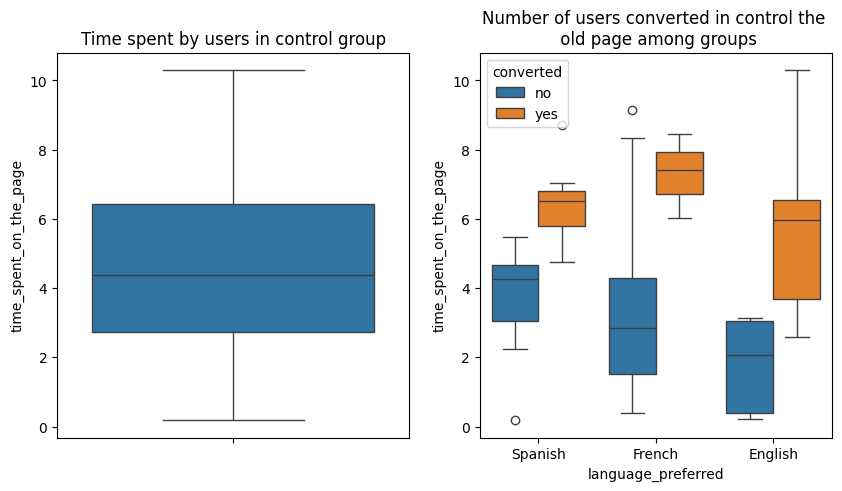

In [61]:
## Plot to create boxplots for time spent on the old landing page overall as well as across different language groups
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data=control_df, y="time_spent_on_the_page", ax=axes[0]).set_title("Time spent by users in control group");
sns.boxplot(data=control_df, x="language_preferred", y="time_spent_on_the_page", hue="converted", ax=axes[1]).set_title("Number of users converted in control the \n old page among groups");

From the boxplot, it is evident that people who **did not convert** spent less time on the page whereas the people who **converted** spent more time on the landing page

This sentiment is also true to users of all the three languages

### Treatment Group

In [62]:
#Filtering only the treament group details from the raw_data
treatment_df = raw_data[raw_data['group'] == "treatment"].reset_index(drop=True)
display(treatment_df.describe().T)
unique_values = treatment_df.describe(include="object").transpose(copy=True)
unique_values["unique_values"] = [treatment_df[x].value_counts().to_dict() for x in unique_values.index.tolist()]
display(unique_values[["unique", "unique_values"]].drop(index=["user_id", "landing_page"]))

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


,unique,unique_values
group,1,{'treatment': 50}
converted,2,"{'yes': 33, 'no': 17}"
language_preferred,3,"{'Spanish': 17, 'French': 17, 'English': 16}"


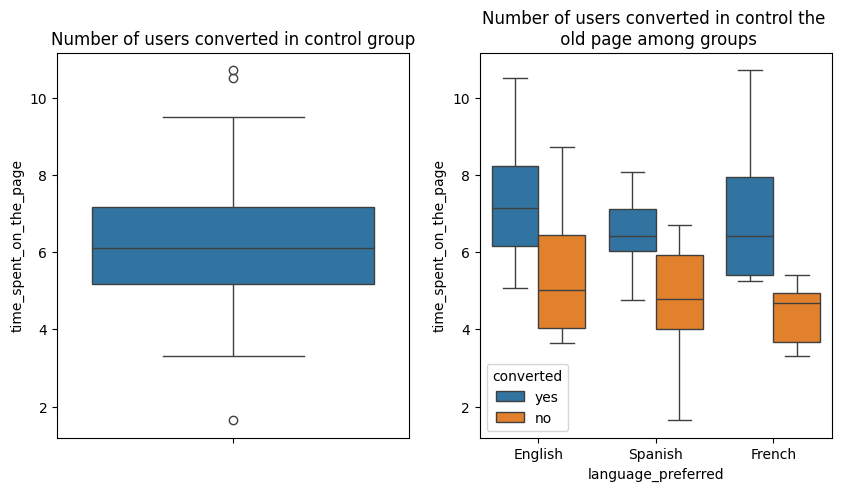

In [63]:
## Plot to create boxplots for time spent on the new landing page overall as well as across different language groups
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data=treatment_df, y="time_spent_on_the_page", ax=axes[0]).set_title("Number of users converted in control group");
sns.boxplot(data=treatment_df, x="language_preferred", y="time_spent_on_the_page", hue="converted", ax=axes[1]).set_title("Number of users converted in control the \n old page among groups");

### Comparison between control group and treatment group

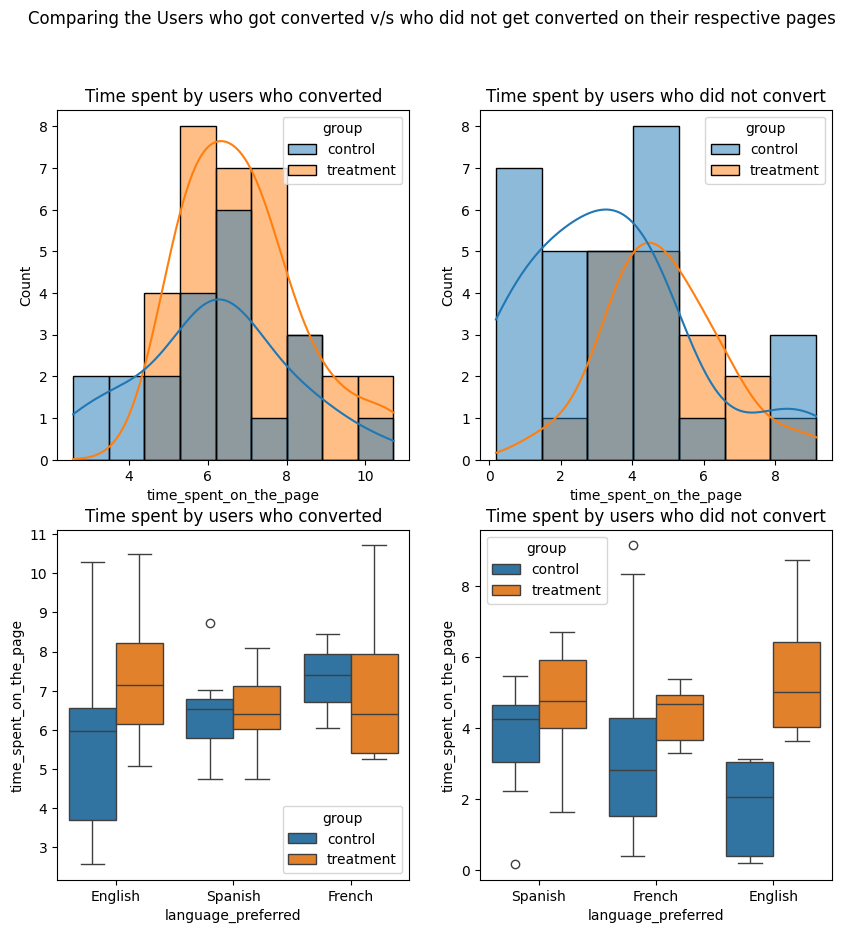

In [64]:
# Plots to create histogram and boxplots to understand the distribution of time spent on their respective landing pages

fig, axes = plt.subplots(2,2, figsize = (10,10))
hue_order = ["control", "treatment"]
sns.histplot(data=raw_data[raw_data["converted"] == "yes"], x="time_spent_on_the_page", kde=True, hue="group", ax=axes[0,0], hue_order=hue_order).set_title("Time spent by users who converted")
sns.histplot(data=raw_data[raw_data["converted"] == "no"], x="time_spent_on_the_page", kde=True, hue="group", ax=axes[0,1], hue_order=hue_order).set_title("Time spent by users who did not convert")
sns.boxplot(data=raw_data[raw_data["converted"] == "yes"], x="language_preferred", y="time_spent_on_the_page", hue="group", ax=axes[1,0], hue_order=hue_order).set_title("Time spent by users who converted")
sns.boxplot(data=raw_data[raw_data["converted"] == "no"], x="language_preferred", y="time_spent_on_the_page", hue="group", ax=axes[1,1], hue_order=hue_order).set_title("Time spent by users who did not convert")
fig.suptitle("Comparing the Users who got converted v/s who did not get converted on their respective pages")
plt.show()

From the above graphs, It is evident that the users spend more time on the new page in comparison to the old page. This behaviour is also seen across all groups.
The control group however spends the least amount of time on the landing page indicating that the old landing page might not be favourable to the users



## Questions to Determine the Effectiveness of the new page

**To conduct experiments on the following questions,** \
**The Level of Significance is  $$ α = 0.05 $$**

#### **Do the users spend more time on the new landing page than the old landing page?**

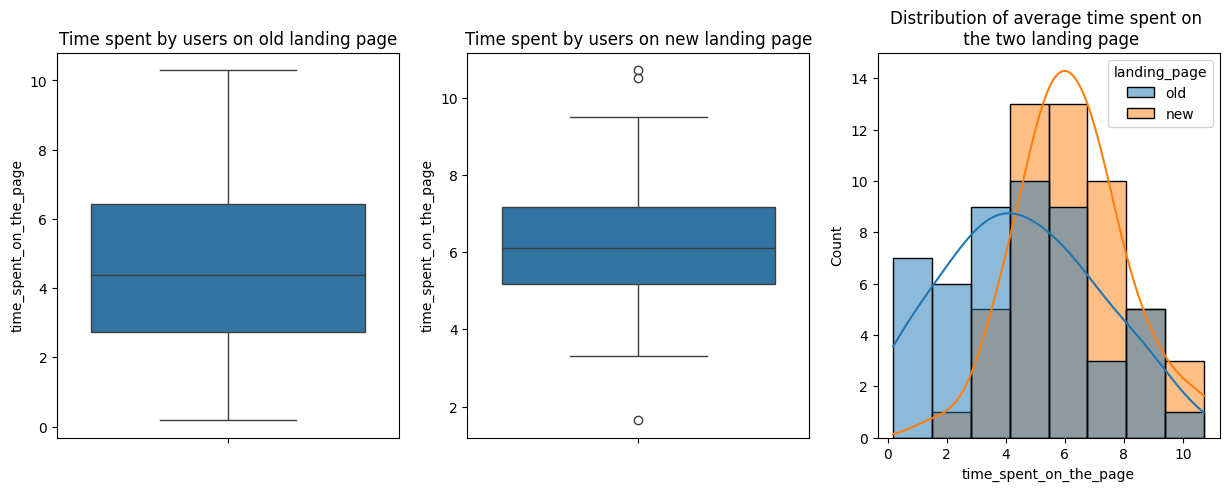



The average time spent on the old landing page is 4.53 minutes
The average time spent on the new landing page is 6.22 minutes


In [65]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
# Boxplot to understand to average time spent on the old landing page
sns.boxplot(data=control_df, y="time_spent_on_the_page", ax=axes[0]).set_title("Time spent by users on old landing page");
# Boxplot to understand to average time spent on the new landing page
sns.boxplot(data=treatment_df, y="time_spent_on_the_page", ax=axes[1]).set_title("Time spent by users on new landing page");
# Histogram to compare the distribution of average time spent on the two landing page
sns.histplot(data = raw_data, x="time_spent_on_the_page", hue="landing_page", ax=axes[2], kde=True).set_title("Distribution of average time spent on \n the two landing page")
plt.show()
print("\n")
old_landing_page_mean = round(control_df['time_spent_on_the_page'].mean(),2)
print(f"The average time spent on the old landing page is {old_landing_page_mean} minutes")

new_landing_page_mean = round(treatment_df['time_spent_on_the_page'].mean(),2)
print(f"The average time spent on the new landing page is {new_landing_page_mean} minutes")

From sample population of 100 users, out of which 50 users are shown old landing page and 50 users are shown new landing page. From the above boxplot and histogram plot, The users shown the **new landing page** spent more time in comparison to the users shown the **old landing page**.

**Therefore the null hypothesis is:**

  $$H_0: \mu = \text{4.53 min}$$

Alternatively, it is hypothesized that the time spent on the new landing page is higher so, \
**The alternate hypothesis should be:**

$$ H_a : \mu > \text{4.53 min}$$

Since the population standard deviation for both groups is not given and the comparison is a *one-tailed* comparison among *two samples*. Hence we should use **2-samples t-test**


In [66]:
# Tmport the necessary libraries
from scipy.stats import ttest_ind

# Calculate the p value using scipy module
test_stat, p_value = ttest_ind(control_df["time_spent_on_the_page"], treatment_df["time_spent_on_the_page"])
print(f"The p_value for this use-case is {round(p_value,5)}")

# Check if the p value is lower than the level of significance
if p_value < 0.05:
  print("The p_value is significantly lower, therefore we should reject the null hypothesis")
else:
  print("The p_value is higher, hence we should accept the null hypothesis for overall data")

The p_value for this use-case is 0.00026
The p_value is significantly lower, therefore we should reject the null hypothesis


The p_value for this test is 0.00026 which is significantly lower than 0.05. This indicates that  we can reject the null hypothesis which would mean that **Time Spent on the New Landing Page by the users is higher than the time spend on the old landing page**

#### **Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

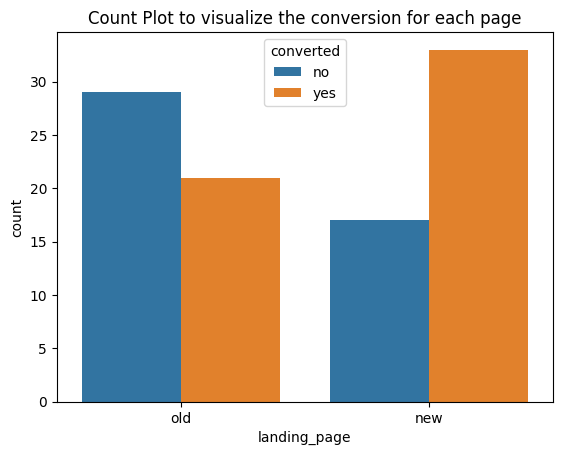

In [67]:
# Plot to visualize the proportion of conversions for both the pages
sns.countplot(data=raw_data, x="landing_page", hue="converted").set_title("Count Plot to visualize the conversion for each page");

From sample data, it is evident that the conversion rate for the new landing page is significantly higher than the conversion rate for old landing page. \
However we have to test whether the conversion rate for the new landing page is significantly higher. This leads to the assumption that old page attracted users, Hence \
**The null hypothesis for this problem:**

$$H_0 : p_{old}\ {\geq}\ p_{new}$$

Alternatively we have to test whether the conversion rate, which is higher for the sample data, is true for the population, \
**Hence the alternate hypothesis is:**

$$ H_a : p_{old}\ {\lt} \ p_{new} $$

 The outcome for the conversion also has only two outcomes (Converted or not converted) which follows a **Binomial Distribution**. Hence the test which we would use is **Two-Proportion Z Test**

In [68]:
# Importing the necessary libraries
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Creating an array denoting the number of successful conversions
success_array = np.array([len(control_df[control_df["converted"] == "yes"]), len(treatment_df[treatment_df["converted"] == "yes"])])

# Creating the total sample space for each proportion/sample
sample_array = np.array([50,50]) ## Since both old and new landing page have 50 users

# Calculating the t_statistic and p_value
t_stat, p_val = proportions_ztest(count=success_array, nobs=sample_array)
print(f"The p_value for this use-case is {round(p_val,5)}")

# Check if the p value is lower than the level of significance
if p_val < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis")
else:
  print("The p_value is higher, hence we should accept the null hypothesis for overall data")

The p_value for this use-case is 0.01605
The p_value is significantly lower, hence we should reject the null hypothesis


Since the p-Value for this problem is lower than 0.05. Hence we can conclude **There is enough evidence to suggest that the conversion rate for new landing page is higher than the conversion rate for old landing page**.

#### **Does the converted status depend on the preferred language?**

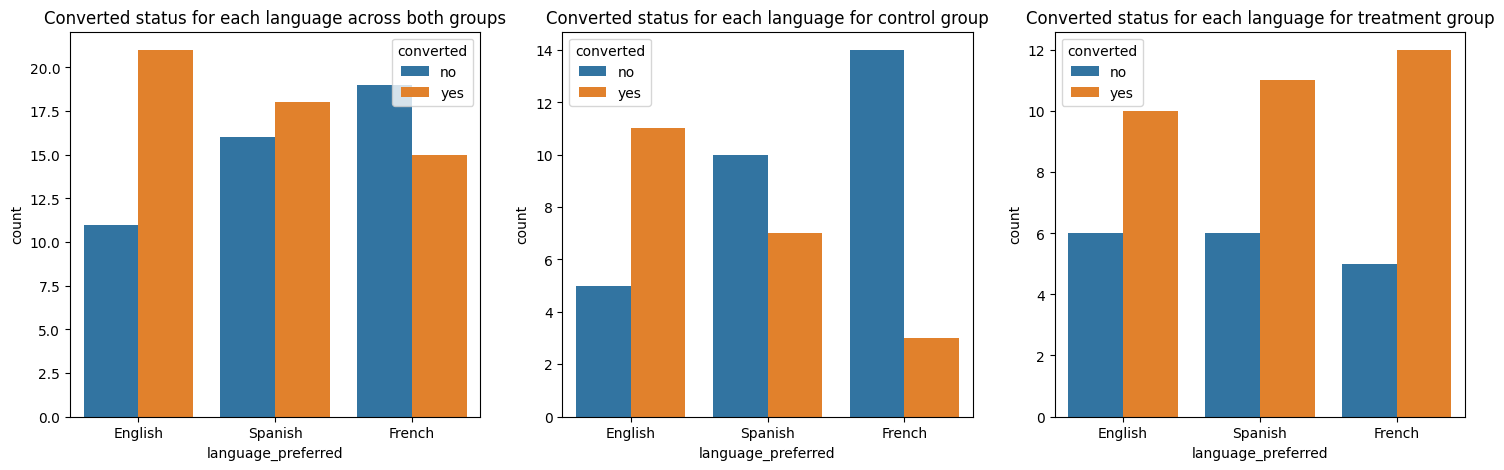

In [69]:
# Creating Count Plots to visualise the conversion among different groups and across different languages
fig, axes = plt.subplots(1,3, figsize = (18,5))
hue_order = ["no","yes"]
x_order = ['English', 'Spanish', 'French']
sns.countplot(data=raw_data, x="language_preferred", hue="converted", ax=axes[0], order=x_order, hue_order=hue_order).set_title("Converted status for each language across both groups");
sns.countplot(data=control_df, x="language_preferred", hue="converted", ax=axes[1], hue_order=hue_order, order=x_order).set_title("Converted status for each language for control group");
sns.countplot(data=treatment_df, x="language_preferred", hue="converted", ax=axes[2], hue_order=hue_order, order=x_order).set_title("Converted status for each language for treatment group");

In [70]:
# Function to create a contingency table
def create_contingency_table(df):
  contingency_table = pd.crosstab(index=df["language_preferred"], columns = df["converted"])
  print("\n")
  return contingency_table

In the sample provided, The conversion numbers are high for Spanish and English, whereas this is not translated for the users that prefer French overall.
In the *control group*, only English users converted, whereas
In the *treatment group*, users of all three language are converted.
It is still unclear whether converted status is dependent on the language. Hence the **null hypothesis** is as follows:

$$ H_0 = \text{language is independent of converted status} $$

Therefore, the **alternative hypothesis** is as follows:
$$ H_a = \text{language is not independent of converted status} $$ \


Since we have to test the independence between two categorical variables, We will perform the **Chi-Square Test of Independence**

In [71]:
# Importing the Necessary Libraries
from scipy.stats import chi2_contingency

# Calculating the t_statistic and p_value
display(create_contingency_table(raw_data))
chi, p_value, dof, expected = chi2_contingency(create_contingency_table(raw_data))
print(f"The p_value for this use-case is {round(p_value,5)}")

# Check if the p value is lower than the level of significance
if p_value < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis for overall data")
else:
  print("The p_value is higher, hence we should accept the null hypothesis for overall data")

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18




The p_value for this use-case is 0.21299
The p_value is higher, hence we should accept the null hypothesis for overall data


In [72]:
# Calculating the t_statistic and p_value
display(create_contingency_table(control_df))
chi, p_value, dof, expected = chi2_contingency(create_contingency_table(control_df))
print(f"The p_value for this use-case is {round(p_value,5)}")

# Check if the p value is lower than the level of significance
if p_value < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis for overall data")
else:
  print("The p_value is higher, hence we should accept the null hypothesis for overall data")

converted,no,yes
language_preferred,,
English,5,11
French,14,3
Spanish,10,7




The p_value for this use-case is 0.01201
The p_value is significantly lower, hence we should reject the null hypothesis for overall data


In [73]:
# Calculating the t_statistic and p_value
display(create_contingency_table(treatment_df))
chi, p_value, dof, expected = chi2_contingency(create_contingency_table(treatment_df))
print(f"The p_value for this use-case is {round(p_value,5)}")

# Check if the p value is lower than the level of significance
if p_value < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis for overall data")
else:
  print("The p_value is higher, hence we should accept the null hypothesis for overall data")

converted,no,yes
language_preferred,,
English,6,10
French,5,12
Spanish,6,11




The p_value for this use-case is 0.87831
The p_value is higher, hence we should accept the null hypothesis for overall data


There is very little evidence to say that language is independent of the converted status. Hence we would require more samples to test this assumption.

#### **Is the mean time spent on the new page same for the different language users?**

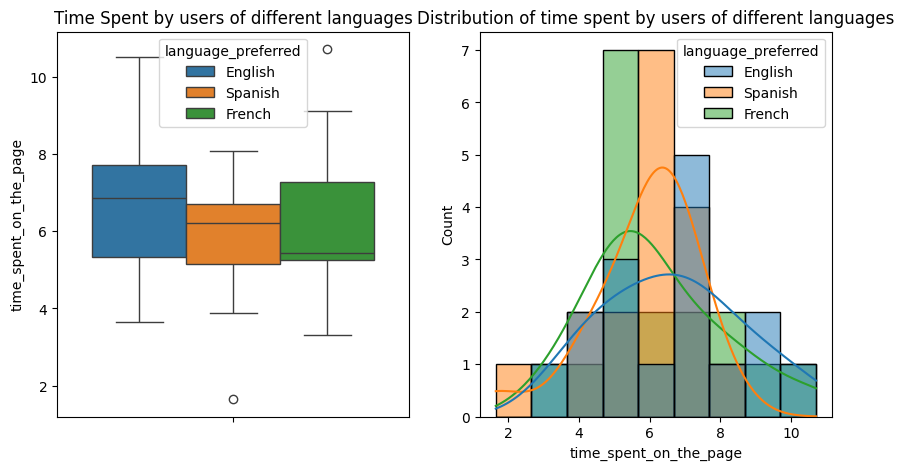

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
# Boxplot to visualize the averages of the time spent across different language users
sns.boxplot(data=treatment_df, y="time_spent_on_the_page", hue="language_preferred", ax=axes[0]).set_title("Time Spent by users of different languages");
# Boxplot to visualize the Distribution of the time spent across different language users
sns.histplot(data=treatment_df, x="time_spent_on_the_page", hue="language_preferred", ax=axes[1], kde=True).set_title("Distribution of time spent by users of different languages");

Boxplot and Histogram for time spent on the new page is plotted to visualise the average time spent on the new page from which we can conclude that the means are equal. However, we have to compare the average time spent by the users on the new landing page for the population. For this problem. We have to use the **ANOVA test** which compares the **mean/variances** among the groups of users(based on languages).
Hence the **null hypothesis** is:

$$ H_0 : \mu_{english} = \mu_{spanish} = \mu_{french}$$

Therefore, the **alternative hypothesis** is:

$$ H_a : \text{either of the means are not equal} $$

To perform ANOVA test, we need to confirm the following:
*   Samples are independent simple random samples: Which is already confirmed in the objective
*   The group populations are normally distributed: Need to conduct the Shapiro's test
*   The group populations have a common variance: Need to conduct the Levene's Test







To check if the group population is normally distributed, we have to conduct the **Shapiro's Test**

Hence the **null hypothesis** is:

$$ H_0 : \text{Group Population is normally distributed} $$

Therefore, the **alternative hypothesis** is:

$$ H_a : \text{Group Population is not normally distributed} $$

In [75]:
from scipy.stats import shapiro
t_test, p_val = shapiro(treatment_df["time_spent_on_the_page"])
print(f"The p_value for this use-case is {round(p_value,5)}")
if p_val < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis")
else:
  print("The p_value is higher, hence we should accept the null hypothesis")

The p_value for this use-case is 0.87831
The p_value is higher, hence we should accept the null hypothesis


Since the p_value is higher, we accept the null hypothesis and conclude that the group population is normally distributed

To check if the group population is normally distributed, we have to conduct the **Levene's Test**

Hence the **null hypothesis** is:

$$ H_0 : \text{All the population variances are equal} $$

Therefore, the **alternative hypothesis** is:

$$ H_a : \text{All the population variances are not equal} $$

In [76]:
from scipy.stats import levene

english_time = treatment_df[treatment_df["language_preferred"] == "English"]["time_spent_on_the_page"]
french_time = treatment_df[treatment_df["language_preferred"] == "French"]["time_spent_on_the_page"]
spanish_time = treatment_df[treatment_df["language_preferred"] == "Spanish"]["time_spent_on_the_page"]
t_stat, p_val = levene(english_time, french_time, spanish_time)
print(f"The p_value for this use-case is {round(p_value,5)}")
if p_val < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis")
else:
  print("The p_value is higher, hence we should accept the null hypothesis")

The p_value for this use-case is 0.87831
The p_value is higher, hence we should accept the null hypothesis


The assumptions hold true, since the population distribution is normally distributed and population variances are equal. We can perform the **ANOVA test**

In [77]:
from scipy.stats import f_oneway

english_time = treatment_df[treatment_df["language_preferred"] == "English"]["time_spent_on_the_page"]
french_time = treatment_df[treatment_df["language_preferred"] == "French"]["time_spent_on_the_page"]
spanish_time = treatment_df[treatment_df["language_preferred"] == "Spanish"]["time_spent_on_the_page"]
t_stat, p_val = f_oneway(english_time, french_time, spanish_time)
print(f"The p_value for this use-case is {round(p_value,5)}")
if p_val < 0.05:
  print("The p_value is significantly lower, hence we should reject the null hypothesis")
else:
  print("The p_value is higher, hence we should accept the null hypothesis")

The p_value for this use-case is 0.87831
The p_value is higher, hence we should accept the null hypothesis


Since the p_value is very high, We can accept the null hypothesis that the **mean time spent for users of different language**

## Conclusion and Business Recommendation

From the analysis of the various questions above and conducting many statistical tests, we can conclude the following:

* Time Spent on the new page is High
* Conversion Rates are also high for the new page
* The Conversion does not depend upon the languages as well.
* Average time spent by different language users are also same indicating the page is getting the same response across different types of users

Hence, It is very bneficial for E-news Company to roll out the new landing page to a wider audience. However there are some more recommendations that the company can incorporate:
 * The New page could be made more engaging to the users to further increase the time spent on the page. Especially for Spanish and French
 * The company can also support more languages as the conversion for the new landing page does not depend on which language was used.